# SISTEMA BASADO EN REGLAS  
## Clasificación dataset IRIS

Importamos librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Ocultamos los warnings de las librerías
import warnings
warnings.filterwarnings("ignore")
# ------------------------------------------------


Carga del dataset Iris  
- Se utiliza el dataset Iris de sklearn, convirtiéndolo a un DataFrame para facilitar su manipulación.
- Se añaden columnas con los nombres de las especies para facilitar la interpretación.

In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target

In [3]:
# Función para asignar la especie
def asignar_especie(row):
    return iris.target_names[int(row['species'])]

# Aplicar la función de asignar especie
data['species_name'] = data.apply(asignar_especie, axis=1)

Forma y cantidad de elementos por clase (especie)

In [4]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [5]:
print("Numero de registros (filas):", data.shape[0])


Numero de registros (filas): 150


In [6]:
print("Número de individuos de cada especie")
print(data['species_name'].value_counts())

Número de individuos de cada especie
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


**Definición de las reglas de clasificación**  

Las reglas dividen el dataset primero por la longitud del pétalo y luego por el ancho.
Cada nodo final se asocia a un conjunto específico de muestras que cumplen las condiciones de las reglas.

In [7]:
def clasificar_basado_en_reglas(longitud_petalo, ancho_petalo):
    if longitud_petalo > 1.9:
        if ancho_petalo > 1.7:
            return "Nodo 4 (Virginica)"
        else:
            if longitud_petalo > 4.8:
                return "Nodo 3 (Virginica)"
            else:
                return "Nodo 2 (Versicolor)"
    
    else:
        return "Nodo 1 (Setosa)"        

**Aplicación de las reglas**  

Se evalúan las reglas para cada muestra del dataset, y el nodo correspondiente se asigna en una nueva columna (nodo).   

- Función *asignar_nodo*:

    Esta función toma una fila como entrada (es decir, un objeto Series) y aplica la función **clasificar_basado_en_reglas** utilizando las columnas relevantes de esa fila.

- Uso de apply:

    El comando **apply** utiliza la función *asignar_nodo* sobre cada nodo (mapeo).

In [8]:
# Función para mapear las reglas
def asignar_nodo(row):
    return clasificar_basado_en_reglas(row['petal length (cm)'], row['petal width (cm)'])

# Aplicar la función de mapeo
data['nodo'] = data.apply(asignar_nodo, axis=1)

**Visualización gráfica de los nodos finales**  

- Se crea un gráfico de barras para cada nodo final.
- En cada gráfico se muestra un histograma con las cantidades de las especies clasificadas en dicho nodo.

In [9]:
nodos_finales = data['nodo'].unique()

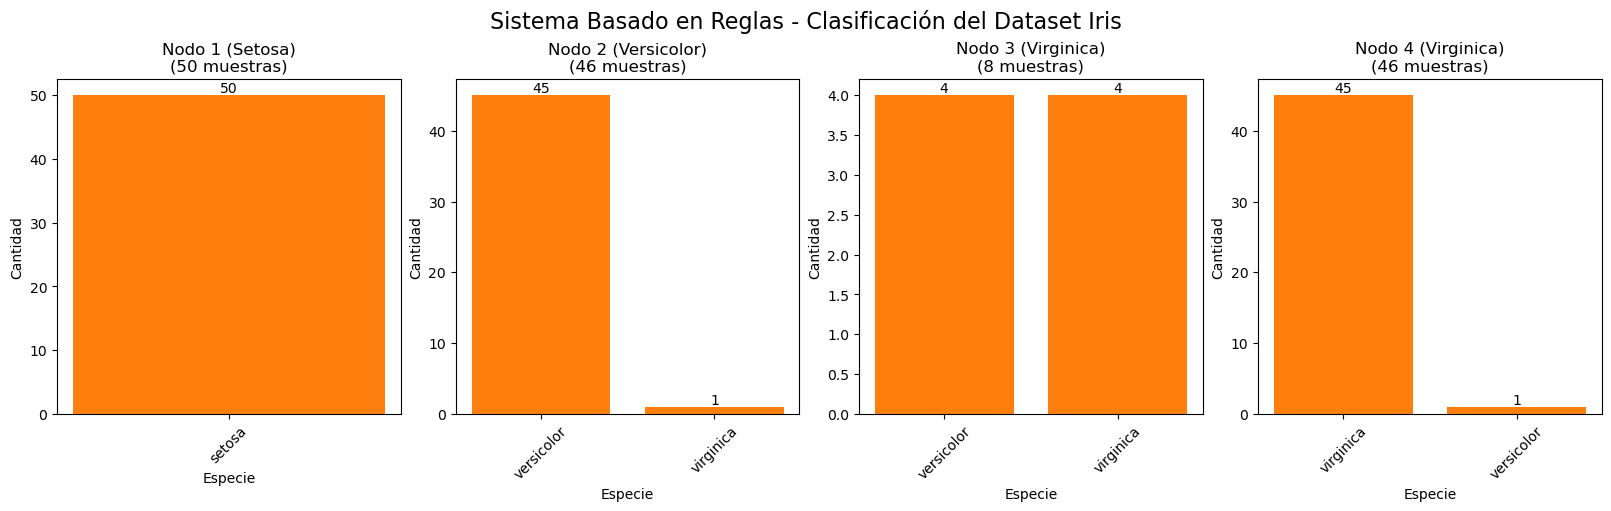

In [10]:
fig, axes = plt.subplots(1, len(nodos_finales), figsize=(16, 5), constrained_layout=True)

for ax, nodo in zip(axes, nodos_finales):
    nodo_data = data[data['nodo'] == nodo]
    species_counts = nodo_data['species_name'].value_counts()
    # Crear las barras
    bars = ax.bar(species_counts.index, species_counts.values)
    
    # Añadir las cantidades encima de las barras
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Posición horizontal (centro de la barra)
            height,  # Posición vertical (altura de la barra)
            str(height),  # Texto a mostrar (la cantidad)
            ha='center', va='bottom', fontsize=10  # Alineación y tamaño de fuente
        )
    
    # Configurar títulos y etiquetas
    ax.bar(species_counts.index, species_counts.values)
    ax.set_title(f"{nodo}\n({len(nodo_data)} muestras)")
    ax.set_xlabel("Especie")
    ax.set_ylabel("Cantidad")
    ax.set_xticklabels(species_counts.index, rotation=45)

plt.suptitle("Sistema Basado en Reglas - Clasificación del Dataset Iris", fontsize=16)
plt.show()